## Homework Week 11

1. Why is it generally preferable to use a Logistic Regression classifier rather than a classical Perceptron (i.e., a single layer of threshold logic units trained using the Perceptron training algorithm)? How can you tweak a Perceptron to make it equivalent to a Logistic Regression classifier?

2. Can you list all the hyperparameters you can tweak in a basic MLP? If the MLP overfits the training data, how could you tweak these hyperparameters to try to solve the problem?

3. Train a deep MLP on the MNIST dataset (you can load it using keras.datasets.mnist.load_data(). See what accuracy you can get. Try searching for the optimal learning rate. The MNIST dataset is a set of 70,000 small images of digits handwritten (0-9) by high school students and employees of the US Census Bureau. Each image is labeled with the digit it represents. There are 70,000 images, and each image has 784 features. This is because each image is 28 × 28 pixels, and each feature simply represents one pixel’s intensity, from 0 (white) to 255 (black).

To check the out of sample accuracy: 
```
model.evaluate(X_test, y_test)
```

**Problem 1: Why is it generally preferable to use a Logistic Regression classifier rather than a classical Perceptron (i.e., a single layer of threshold logic units trained using the Perceptron training algorithm)? How can you tweak a Perceptron to make it equivalent to a Logistic Regression classifier?**

A classical Perceptron and Logistic Regression are both classifiers that can be used to predict binary variables and set decision boundries. Logistic Regression uses probability to classify the target in a range between 0 and 1. A classical Perceptron (single-layer perceptron) uses examples and weights to classify values either -1 or 1. Perceptrons take inputs of feature vectors and multiplies them with the weight vector to compute the net input and makes classifications. In the case of a misclassification, the weight is updated and the net input recalculated. This repetition (sometimes 10s of thousands iterations) makes perceptrons time-consuming, when a decision boundry can be easily found with a logistic regression model.

**Problem 2.1: Can you list all the hyperparameters you can tweak in a basic MLP?**

The Scikit-Learn MLP Classifier has the following hyperparameters: hidden_layer_sizes, activation, solver, alpha, batch_size, learning_rate, learning_rate_init, power_t, max_iter, shuffle, random_state, tol, verbose, warm_start, momentum, nesterovs_momentum, early_stopping, validation_fraction, beta_1, beta_2, epsilon, n_iter_no_change, max_fun.

**Problem 2.2: If the MLP overfits the training data, how could you tweak these hyperparameters to try to solve the problem?**

Early_stopping can be set to True and training will be terminated when the validation score is not improving.

Or, a tolerance (tol) can be set to terminate the training when the loss or score is not improving by at least tol for n_iter_no_change (the maximum number of epochs to not see tol improvement).

Or, learning_rate can be set to adaptive which keeps the learning rate constant to ‘learning_rate_init’ as long as training loss keeps decreasing. Each time two consecutive epochs fail to decrease training loss by at least tol, or fail to increase validation score by at least tol if ‘early_stopping’ is on, the current learning rate is divided by 5.

**Problem 3: Train a deep MLP on the MNIST dataset (you can load it using keras.datasets.mnist.load_data(). See what accuracy you can get. Try searching for the optimal learning rate. The MNIST dataset is a set of 70,000 small images of digits handwritten (0-9) by high school students and employees of the US Census Bureau. Each image is labeled with the digit it represents. There are 70,000 images, and each image has 784 features. This is because each image is 28 × 28 pixels, and each feature simply represents one pixel’s intensity, from 0 (white) to 255 (black).**

In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras

(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()
print("X_train Shape:", X_train.shape)
print("y_train Values:", np.unique(y_train))

###Model 1

In [ ]:
#model1 creation

model1 = keras.models.Sequential() #keras model

model1.add(keras.layers.Flatten(input_shape=[28, 28])) #input layer

#hidden layers
model1.add(keras.layers.Dense(100, activation='sigmoid'))
model1.add(keras.layers.Dense(50, activation='sigmoid'))

model1.add(keras.layers.Dense(len(np.unique(y_train)), activation='softmax')) #output layer

model1(X_train)

<tf.Tensor: shape=(60000, 10), dtype=float32, numpy=
array([[0.16092604, 0.03965664, 0.10473278, ..., 0.15350746, 0.11682192,
        0.03146256],
       [0.157025  , 0.03209527, 0.08726551, ..., 0.19488981, 0.10402052,
        0.02806727],
       [0.15760276, 0.03533459, 0.09258626, ..., 0.15044665, 0.12086402,
        0.03088022],
       ...,
       [0.18974268, 0.03885382, 0.08273212, ..., 0.16255164, 0.11853555,
        0.02578707],
       [0.16280916, 0.03785788, 0.09159419, ..., 0.1993969 , 0.12086872,
        0.02389017],
       [0.16832487, 0.03797522, 0.09618536, ..., 0.13419726, 0.11291031,
        0.02952256]], dtype=float32)>

In [ ]:
#compile the model

model1.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

In [ ]:
#set early stopping and fit the model

callback1 = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=1) #terminates when number of epochs with no improvement = 1

history1 = model1.fit(X_train, y_train, 
                    epochs=50,
                    validation_data=(X_test, y_test),
                    callbacks=[callback1]
                    )

Epoch 1/50
1875/1875 [==============================] - 6s 3ms/step - loss: 1.4227 - accuracy: 0.7179 - val_loss: 0.8231 - val_accuracy: 0.8631
Epoch 2/50
1875/1875 [==============================] - 5s 3ms/step - loss: 0.6282 - accuracy: 0.8758 - val_loss: 0.4846 - val_accuracy: 0.8966
Epoch 3/50
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4419 - accuracy: 0.8963 - val_loss: 0.3809 - val_accuracy: 0.9080
Epoch 4/50
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3681 - accuracy: 0.9082 - val_loss: 0.3395 - val_accuracy: 0.9124
Epoch 5/50
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3329 - accuracy: 0.9141 - val_loss: 0.3186 - val_accuracy: 0.9156
Epoch 6/50
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3117 - accuracy: 0.9176 - val_loss: 0.2954 - val_accuracy: 0.9214
Epoch 7/50
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2914 - accuracy: 0.9217 - val_loss: 0.2936 - val_accuracy:

In [ ]:
model1.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.2166 - accuracy: 0.9383


[0.21664279699325562, 0.9383000135421753]

        loss  accuracy  val_loss  val_accuracy
0   1.422688  0.717850  0.823118        0.8631
1   0.628217  0.875767  0.484564        0.8966
2   0.441926  0.896333  0.380888        0.9080
3   0.368140  0.908167  0.339493        0.9124
4   0.332937  0.914083  0.318604        0.9156
5   0.311727  0.917583  0.295439        0.9214
6   0.291382  0.921717  0.293560        0.9225
7   0.278281  0.924283  0.274291        0.9250
8   0.263019  0.927800  0.263322        0.9266
9   0.253725  0.929233  0.246961        0.9319
10  0.245174  0.932300  0.243795        0.9302
11  0.242945  0.931150  0.240088        0.9318
12  0.238239  0.932933  0.236451        0.9339
13  0.230857  0.935617  0.222337        0.9385
14  0.225408  0.935250  0.219618        0.9378
15  0.218744  0.936867  0.217263        0.9384
16  0.208468  0.939283  0.209158        0.9410
17  0.211508  0.939017  0.216643        0.9383


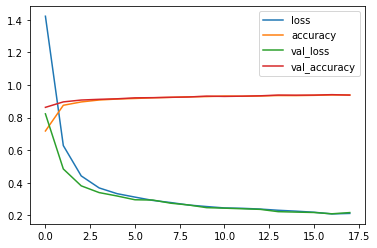

In [ ]:
#create dataframe containing the metrics measured at the end of each epoch on the training and validation sets
df = pd.DataFrame(history1.history)
print(df)

# plot the scores
df.plot()

###Model 2

In [ ]:
#model2 creation

model2 = keras.models.Sequential() #keras model

model2.add(keras.layers.Flatten(input_shape=[28, 28])) #input layer

#hidden layers - default activation function is ReLU
model2.add(keras.layers.Dense(50, activation='sigmoid'))
model2.add(keras.layers.Dense(10, activation='sigmoid'))

model2.add(keras.layers.Dense(len(np.unique(y_train)), activation='softmax')) #output layer

model2(X_train)

<tf.Tensor: shape=(60000, 10), dtype=float32, numpy=
array([[0.08026844, 0.08804706, 0.32702228, ..., 0.0620256 , 0.06883678,
        0.03947371],
       [0.0743455 , 0.07951791, 0.3290584 , ..., 0.06492935, 0.07290133,
        0.0395142 ],
       [0.06648637, 0.07761257, 0.34128654, ..., 0.05593676, 0.05901832,
        0.038095  ],
       ...,
       [0.08869168, 0.08088581, 0.31007603, ..., 0.06447735, 0.0722542 ,
        0.04176708],
       [0.06403504, 0.07395824, 0.3267385 , ..., 0.07739171, 0.06778841,
        0.03920728],
       [0.07927562, 0.08644482, 0.32599786, ..., 0.05212037, 0.06160862,
        0.04088774]], dtype=float32)>

In [ ]:
#compile model2

model2.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

In [ ]:
#set early stopping and fit the model

callback2 = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=1) #terminate if number of epochs with no improvement = 3

history2 = model2.fit(X_train, y_train, 
                    epochs=50,
                    validation_data=(X_test, y_test),
                    callbacks=[callback2]
                    )

Epoch 1/50
1875/1875 [==============================] - 4s 2ms/step - loss: 1.9051 - accuracy: 0.4629 - val_loss: 1.5424 - val_accuracy: 0.6311
Epoch 2/50
1875/1875 [==============================] - 4s 2ms/step - loss: 1.2950 - accuracy: 0.7175 - val_loss: 1.0830 - val_accuracy: 0.7971
Epoch 3/50
1875/1875 [==============================] - 4s 2ms/step - loss: 0.9450 - accuracy: 0.8213 - val_loss: 0.8118 - val_accuracy: 0.8551
Epoch 4/50
1875/1875 [==============================] - 4s 2ms/step - loss: 0.7396 - accuracy: 0.8586 - val_loss: 0.6831 - val_accuracy: 0.8673
Epoch 5/50
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6190 - accuracy: 0.8733 - val_loss: 0.5544 - val_accuracy: 0.8885
Epoch 6/50
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5441 - accuracy: 0.8812 - val_loss: 0.5343 - val_accuracy: 0.8767
Epoch 7/50
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5096 - accuracy: 0.8824 - val_loss: 0.4845 - val_accuracy:

        loss  accuracy  val_loss  val_accuracy
0   1.905074  0.462933  1.542416        0.6311
1   1.294981  0.717483  1.082992        0.7971
2   0.944957  0.821250  0.811824        0.8551
3   0.739608  0.858633  0.683057        0.8673
4   0.619007  0.873267  0.554381        0.8885
5   0.544121  0.881200  0.534323        0.8767
6   0.509604  0.882400  0.484501        0.8898
7   0.464828  0.889567  0.468434        0.8860
8   0.441789  0.894183  0.398880        0.9009
9   0.412552  0.895800  0.396116        0.9001
10  0.396185  0.900783  0.387595        0.9014
11  0.383787  0.901417  0.389805        0.8990
12  0.377901  0.901167  0.370242        0.9003
13  0.363595  0.903600  0.366529        0.9023
14  0.350012  0.908333  0.345568        0.9073
15  0.336990  0.911617  0.354460        0.9021
16  0.342064  0.907233  0.326740        0.9111


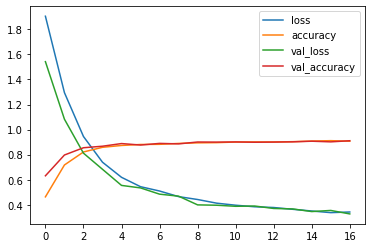

In [ ]:
#create dataframe containing the metrics measured at the end of each epoch on the training and validation sets
df = pd.DataFrame(history2.history)
print(df)

# plot the scores
df.plot()

**See what accuracy you can get.**

I originally set the layers at 300 and 100, the epochs at 50, and the EarlyStopping at monitor='loss' and patience of 3. The model ran for 37 epochs, took a long time, but resulted in a 96% accuracy. Because it took so long to run, I changed the hidden layer density to 100 and 50, and then to 50 and 10. I got an accuracy of 94% and 91%.

In [ ]:
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import ParameterGrid

def make_model(optimizer):
  model = keras.models.Sequential()
  model.add(keras.layers.Flatten(input_shape=[28, 28]))

  model.add(keras.layers.Dense(50, activation='sigmoid'))
  model.add(keras.layers.Dense(10, activation='sigmoid'))

  model.add(keras.layers.Dense(len(np.unique(y_train)), activation='softmax'))

  model.add(keras.layers.Dense(10, activation="softmax"))


  model.compile(loss="sparse_categorical_crossentropy",
                optimizer=optimizer,
                metrics=["accuracy"])

  return model

cls = KerasClassifier(build_fn=make_model)

SGD_lr = {
    tf.keras.optimizers.SGD(learning_rate=0.01),
    tf.keras.optimizers.SGD(learning_rate=0.001),
    tf.keras.optimizers.SGD(learning_rate=0.0001)
}

param_grid = {'optimizer' : SGD_lr}

callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=1)

results = list()
for params in ParameterGrid(param_grid=param_grid):
  cls.set_params(**params)

  print(params)

  print('Training...')
  history = cls.fit(X_train, y_train, epochs=100, validation_data=(X_test, y_test), callbacks=[callback])

  df = pd.DataFrame(history.history)

  print('Val Loss:', history.history['val_loss'][-1])
  print('Val Acc: ', history.history['val_accuracy'][-1])


  results.append(df)

{'optimizer': <keras.optimizers.optimizer_v2.gradient_descent.SGD object at 0x7f271d995100>}
Training...
Epoch 1/100


<ipython-input-36-fc98d2d42f7a>:22: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  cls = KerasClassifier(build_fn=make_model)


1875/1875 [==============================] - 7s 3ms/step - loss: 2.3031 - accuracy: 0.0722 - val_loss: 2.3007 - val_accuracy: 0.0897
Epoch 2/100
1875/1875 [==============================] - 5s 3ms/step - loss: 2.2985 - accuracy: 0.1182 - val_loss: 2.2961 - val_accuracy: 0.1310
Epoch 3/100
1875/1875 [==============================] - 6s 3ms/step - loss: 2.2940 - accuracy: 0.1370 - val_loss: 2.2916 - val_accuracy: 0.1276
Epoch 4/100
1875/1875 [==============================] - 6s 3ms/step - loss: 2.2895 - accuracy: 0.1322 - val_loss: 2.2871 - val_accuracy: 0.1354
Epoch 5/100
1875/1875 [==============================] - 6s 3ms/step - loss: 2.2850 - accuracy: 0.1452 - val_loss: 2.2824 - val_accuracy: 0.1490
Epoch 6/100
1875/1875 [==============================] - 5s 3ms/step - loss: 2.2801 - accuracy: 0.1578 - val_loss: 2.2773 - val_accuracy: 0.1642
Epoch 7/100
1875/1875 [==============================] - 6s 3ms/step - loss: 2.2747 - accuracy: 0.1749 - val_loss: 2.2715 - val_accuracy: 0.17

**Try searching for the optimal learning rate.**

I used grid search method to search SGD learning rates: 0.01, 0.001, and 0.0001. The best accuracy resulted from the learning rate of 0.001, which I believe is the default learning rate.